In [1]:
import larcv
import numpy
from matplotlib import pyplot as plt

font = {
        'family' : 'serif',
        'weight' : 'normal',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)

In [11]:
# f_name = "/data/datasets/NEXT/dnn-dataset/simulation/outdated_larcv/NEXT_White_train_randomized.h5"
# f_name = "/data/datasets/NEXT/NEXT-100-simulation/tl208/r0/r0_larcv_all.r0_merged.h5"

f_name = "/home/cadams/Tl208_NEW_v1.2.0_v9.larcv_0.h5_cuts.h5"
# f_name = "/data/datasets/NEXT/dnn-dataset/simulation/6206_larcv/larcv/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.cdst_6206.larcv_cuts.h5"

In [14]:
def get_energy_and_label(f_name):
    io = larcv.IOManager()
    io.add_in_file(f_name)
    io.initialize()
    print(io.product_list())
    print(io.producer_list("cluster3d"))

    true_energy = []
    si_energy   = []
    chits_e     = []
    label       = []
    mc_dep_e    = []

    for i_entry in range(io.get_n_entries()):
        io.read_entry(i_entry)

        chits = io.get_data("sparse3d","chitshighTh").at(0)
        # chits = io.get_data("sparse3d","chitshighTh").at(0)
        summed_energy = numpy.sum(chits.values())
        chits_e.append(summed_energy)

        # chits = io.get_data("sparse2d", "S2Pmt").at(0)
        # summed_chits = numpy.sum(chits.values())
        # chits_e.append(summed_chits)

        e_deps = io.get_data("sparse3d","hits_e").at(0)
        summed_energy = numpy.sum(e_deps.values())
        si_energy.append(summed_energy)

        p_label = io.get_data("particle", "event")
        # p_label = io.get_data("particle", "label")
        # print(p_label.at(0).energy_init())
        label.append(p_label.at(0).pdg_code())
        true_energy.append(p_label.at(0).energy_deposit())
        # print(i_entry)
        if i_entry > 50000: break
    return numpy.asarray(true_energy), numpy.asarray(si_energy), numpy.asarray(chits_e), numpy.asarray(label), numpy.asarray(mc_dep_e)




In [15]:
true_energy, si_energy, chits_e, label, mc_dep_e = get_energy_and_label(f_name)

['bbox3d', 'cluster3d', 'particle', 'particle', 'sparse2d', 'sparse3d', 'sparse3d', 'sparse3d', 'sparse3d', 'sparse3d', 'sparse3d']
['mc_hits']
    [NORMAL]  <IOManager::prepare_input> Opening a file in READ mode: "/home/cadams/Tl208_NEW_v1.2.0_v9.larcv_0.h5_cuts.h5"
    [NORMAL]  <IOManager::prepare_input> File "/home/cadams/Tl208_NEW_v1.2.0_v9.larcv_0.h5_cuts.h5" has 499 entries
    [NORMAL]  <IOManager::initialize> Prepared input with 499 entries...


[1.74861239 0.46511105        nan        nan        nan 0.49236087
 1.21354552 1.35301731        nan 1.14816887]
[1.7275447  0.4641199  0.3593206  0.62401134 2.0844145  0.49106437
 1.2043166  1.316205   1.2126964  1.1350228 ]
[0 0 0 0 0 0 1 0 0 0]


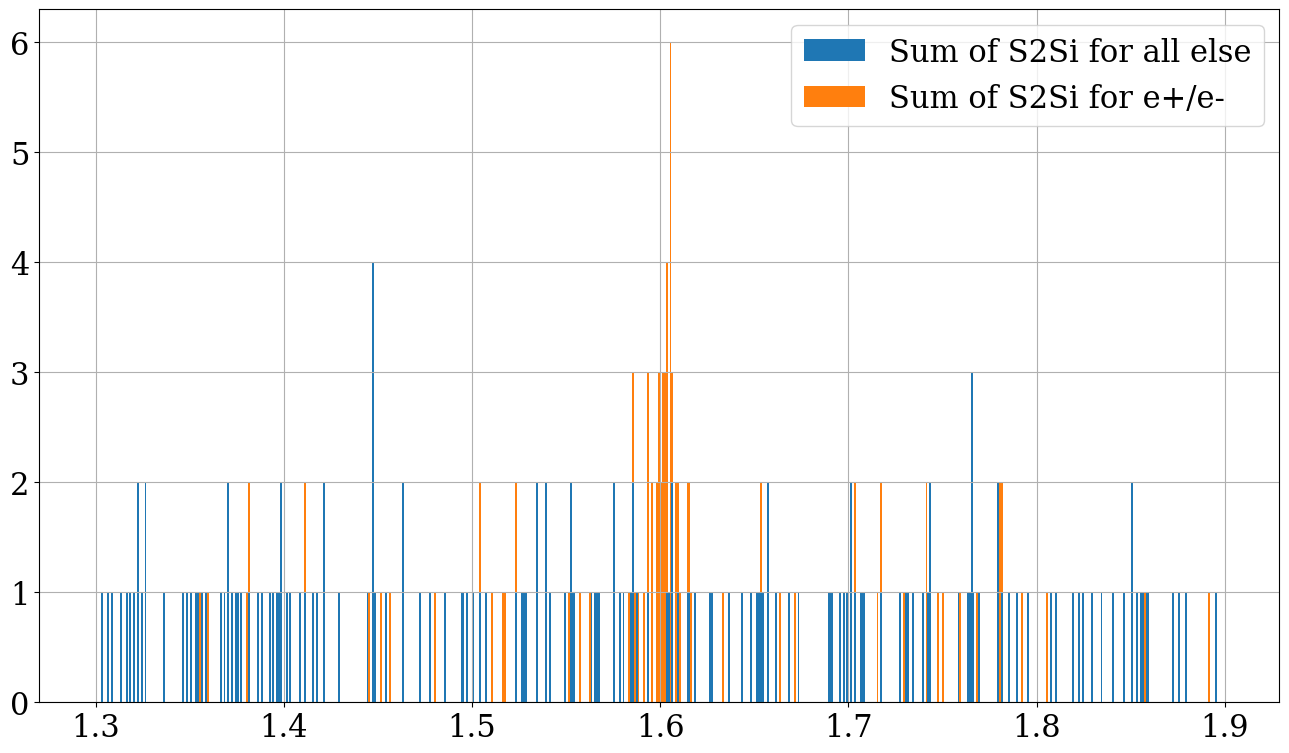

In [9]:
plt.figure(figsize=(16,9))

sig_mask = label==1
bkg_mask = label==0

print(true_energy[0:10])
print(chits_e[0:10])
print(si_energy[0:10])

print(label[0:10])

bins = numpy.arange(1.30,1.9, .001)
width= bins[1] - bins[0]
def histogram(data_arr, bins):
    counts, edges = numpy.histogram(data_arr, bins)

    return counts, 0.5*(edges[1:] + edges[:-1])

sig_counts, sig_x = histogram(chits_e[sig_mask], bins)
bkg_counts, bkg_x = histogram(chits_e[bkg_mask], bins)

plt.bar(sig_x, bkg_counts,  width=width,  label="Sum of S2Si for all else")
plt.bar(sig_x, sig_counts, bottom=bkg_counts, width=width, label="Sum of S2Si for e+/e-")

plt.legend()


plt.grid(True)
plt.show()

In [10]:
sig_counts, sig_x = histogram(chits_e[sig_mask], bins)
bkg_counts, bkg_x = histogram(chits_e[bkg_mask], bins)


e_min=1.58
e_max=1.62

min_bins = sig_x > e_min  
max_bins = sig_x < e_max
sig_bins = [ a and b for a, b in zip(min_bins, max_bins)]
bkg_bins = [ not a for a in sig_bins ]

sig_total = numpy.sum(sig_counts)
bkg_total = numpy.sum(bkg_counts)

sig_accept = numpy.sum(sig_counts[sig_bins]) / sig_total
sig_purity = numpy.sum(sig_counts[sig_bins]) / (numpy.sum(sig_counts[sig_bins]) + numpy.sum(bkg_counts[sig_bins]))

bkg_accept = numpy.sum(bkg_counts[bkg_bins]) / bkg_total
bkg_purity = numpy.sum(bkg_counts[bkg_bins]) / (numpy.sum(sig_counts[bkg_bins]) + numpy.sum(bkg_counts[bkg_bins]))

print("Signal range: ", e_min, " to ", e_max)
print("Signal acceptance: ", sig_accept)
print("Signal purity: ", sig_purity)
print("Background acceptance: ", bkg_accept)
print("Background purity: ", bkg_purity)

Signal range:  1.58  to  1.62
Signal acceptance:  0.5
Signal purity:  0.7358490566037735
Background acceptance:  0.9171597633136095
Background purity:  0.7989690721649485


[1.44361637 1.65975561 1.65163433 1.68462117 1.68864772 1.66336844
 1.61470555 1.44313099 1.58596101 1.6021312 ]
[1.4318271 1.6297861 1.6155491 1.6717882 1.6729475 1.6258559 1.6023701
 1.4297744 1.5484087 1.5731206]
[1 0 0 0 0 0 0 0 0 0]


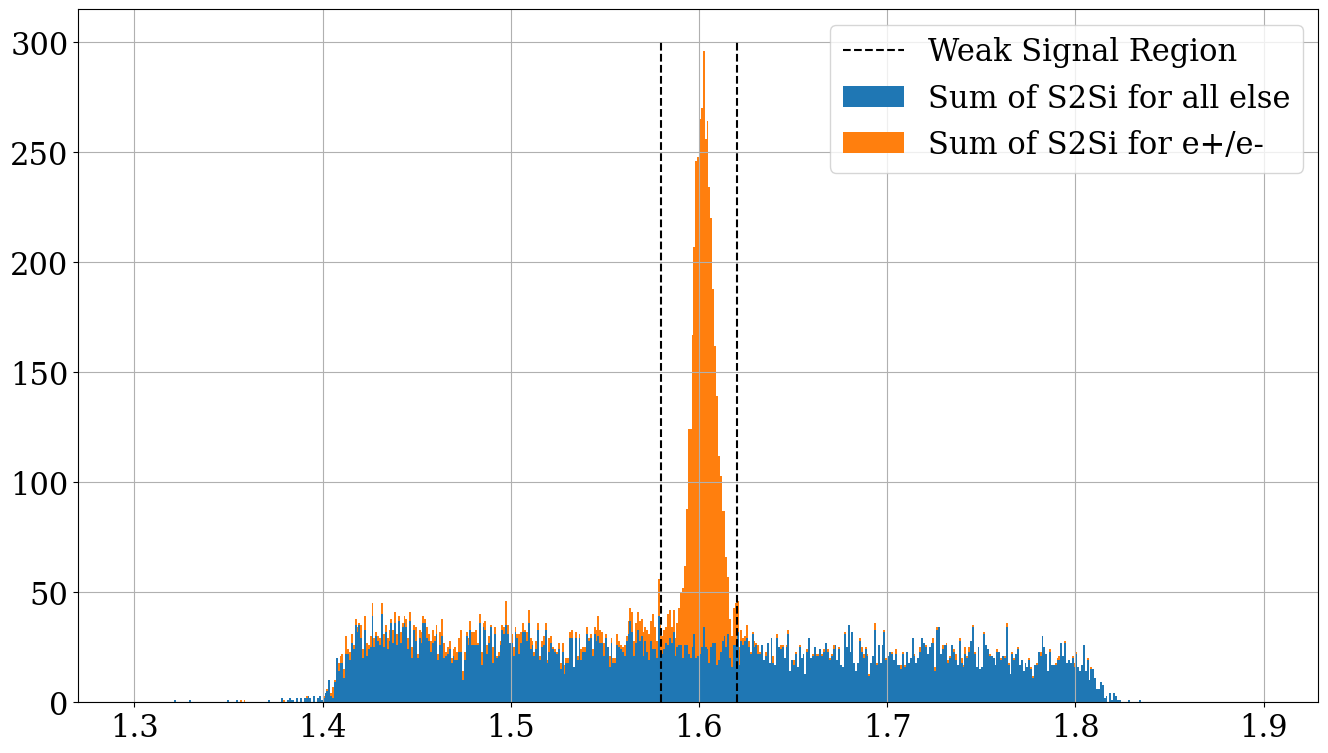

In [37]:
plt.figure(figsize=(16,9))

sig_mask = label==1
bkg_mask = label==0

print(true_energy[0:10])
print(chits_e[0:10])
print(label[0:10])

bins = numpy.arange(1.30,1.9, .001)
width= bins[1] - bins[0]
def histogram(data_arr, bins):
    counts, edges = numpy.histogram(data_arr, bins)

    return counts, 0.5*(edges[1:] + edges[:-1])

sig_counts, sig_x = histogram(chits_e[sig_mask], bins)
bkg_counts, bkg_x = histogram(chits_e[bkg_mask], bins)

plt.bar(sig_x, bkg_counts,  width=width,  label="Sum of S2Si for all else")
plt.bar(sig_x, sig_counts, bottom=bkg_counts, width=width, label="Sum of S2Si for e+/e-")

plt.vlines(x=e_min, ymin=0, ymax=300, color='black', ls='--', label="Weak Signal Region")
plt.vlines(x=e_max, ymin=0, ymax=300, color='black', ls='--')

plt.legend()


plt.grid(True)
plt.show()

In [25]:
plt.figure(figsize=(16,9))

sig_mask = label==1
bkg_mask = label==0

print(si_energy)

bins = numpy.arange(0.0,0.05, .001)
width= bins[1] - bins[0]
def histogram(data_arr, bins):
    counts, edges = numpy.histogram(data_arr, bins)

    return counts, 0.5*(edges[1:] + edges[:-1])

sig_counts, sig_x = histogram(si_energy[sig_mask], bins)
bkg_counts, bkg_x = histogram(si_energy[bkg_mask], bins)

plt.bar(sig_x, bkg_counts,  width=width,  zorder=3, label="Single e-")
plt.bar(sig_x, sig_counts, bottom=bkg_counts, width=width, zorder=3, label="e+/e-")

plt.legend()


plt.grid(True)
plt.savefig("TrueE")
plt.show()

[]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 14369

<Figure size 1600x900 with 0 Axes>

In [7]:
ratio = true_energy / si_energy
plt.figure(figsize=(16,9))

sig_mask = label==1
bkg_mask = label==0

print(ratio)

bins = numpy.arange(0.0,2.5, .01)
width= bins[1] - bins[0]
def histogram(data_arr, bins):
    counts, edges = numpy.histogram(data_arr, bins)

    return counts, 0.5*(edges[1:] + edges[:-1])

sig_counts, sig_x = histogram(ratio[sig_mask], bins)
bkg_counts, bkg_x = histogram(ratio[bkg_mask], bins)

plt.bar(sig_x, bkg_counts,  width=width,  label="Single e-", zorder=3)
plt.bar(sig_x, sig_counts, bottom=bkg_counts, width=width, label="e+/e-", zorder=3)

plt.legend()
plt.xlabel("SUM(S2Si) / True-E")

plt.grid(True)
plt.savefig("EnergyRatio.pdf")
plt.show()

ValueError: operands could not be broadcast together with shapes (507,) (0,) 

In [ ]:
numpy.sum(label==0)

In [ ]:
import h5py
f_name = "/data/datasets/NEXT/dnn-dataset/simulation/6206_larcv/larcv_merged/larcv_merged_r6206_new_tl208_all_4.h5"

In [ ]:
f = h5py.File(f_name)

In [ ]:
f["Data"].keys()


In [ ]:
print(f["Data"].keys())
particles = f["Data"]["particle_event_group"]["particles"]
sparse2d  = f["Data"]["sparse3d_chitslowTh_group"]

In [ ]:
print(sparse2d.keys())

In [ ]:
for d in ["x", "y", "z"]:

    min_val = numpy.min(particles["vtx"][d])
    max_val = numpy.max(particles["vtx"][d])

    n_bins = 100
    bin_width = (max_val - min_val) / n_bins 
    # print(bin_width)
    bins = numpy.arange(min_val, max_val, bin_width)
    hist_values, bin_edges = numpy.histogram(particles["vtx"][d], bins=bins)
    print(hist_values)
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
    plt.bar(bin_centers, hist_values, width=bin_width, label=d, zorder=3)
    plt.grid(True)

    plt.show()


In [ ]:
f.close()

In [ ]:
io = larcv.IOManager()
io.add_in_file(f_name)
io.initialize()
# print(io.product_list())

    # true_energy = []
    # si_energy   = []
    # chits_e     = []
label       = []
    # mc_dep_e    = []
i_max  = 25000
energy = []
for i_entry in range(io.get_n_entries()):
    io.read_entry(i_entry)

    pmaps = io.get_data("sparse3d","chitshighTh").at(0)
    meta = pmaps.meta()
    indexes = pmaps.indexes()
    positions = []
    for i in indexes:
        coordinates = meta.coordinates(i)
        positions.append(meta.position(coordinates))

    positions = numpy.asarray(positions)
    values = pmaps.values()
    energy.append(numpy.sum(values))
    # print("Pmap mean positions:")
    # print(positions.shape)
    # print("X = ", numpy.mean(positions[:,0]), "wX = ", numpy.mean(values*positions[:,0])/numpy.mean(values)  )
    # print("Y = ", numpy.mean(positions[:,1]), "wY = ", numpy.mean(values*positions[:,1])/numpy.mean(values)  )
    # print("Z = ", numpy.mean(positions[:,2]), "wZ = ", numpy.mean(values*positions[:,2])/numpy.mean(values)  )
    # print(positions)
    # print(values)
    


    # pmts = io.get_data("sparse2d","S2Pmt").at(0)
    # meta = pmts.meta()
    # indexes = pmts.indexes()
    # positions = []
    # for i in indexes:
    #     coordinates = meta.coordinates(i)
    #     positions.append(coordinates)
    # positions = numpy.asarray(positions)
    # print(positions.shape)
    # values = pmts.values()
    # print("PMT mean Z: ", numpy.mean(positions[:,1]))
    # # print("values: ", values)
    
    # particle = io.get_data("particle", "event").at(0)
    # print("Position: ", particle.position())
    # # print(p_label.at(0))
    # print(p_label.at(0).energy_deposit())
    # print(p_label.at(0).vertex())
    # label.append(p_label.at(0).pdg_code())
    # true_energy.append(p_label.at(0).energy_deposit())
    if i_entry > i_max:
        break
io.finalize()

In [ ]:
print(energy)

In [ ]:
bins = numpy.arange(1.0, 1.7, 0.01)
counts, bin_edges = numpy.histogram(energy, bins=bins)
print(counts)
bin_c = 0.5*(bin_edges[1:] + bin_edges[:-1])
bin_w = bin_edges[1:] - bin_edges[:-1]
# print(bins)
# print(bin_c)
plt.bar(bin_c, counts, width=bin_w)

In [ ]:
import h5py